In [1]:
import pandas as pd
import networkx as nx
import json

In [2]:
df = pd.read_csv("data_scopus.csv")
df = df.fillna(0)

In [3]:
df.head()

Title  Year  \
0  Virtual reality applications for the built env...  2020   
1  Self-tracking while doing sport: Comfort, moti...  2020   
2  Bridge damage: Detection, IFC-based semantic e...  2020   
3  VR system for spatio-temporal visualization of...  2019   
4  DiseaSE: A biomedical text analytics system fo...  2019   

                  EID                                           Abstract  \
0  2-s2.0-85086464158  With its advanced capabilities of immersive an...   
1  2-s2.0-85082875828  The spread of wearable technologies is paving ...   
2  2-s2.0-85078194587  Building Information Modeling (BIM) representa...   
3  2-s2.0-85075706132  Social media analysis is helpful to understand...   
4  2-s2.0-85074886243  Due to increasing volume and unstructured natu...   

             Publisher Conference name Conference date  \
0        Elsevier B.V.               0               0   
1       Academic Press               0               0   
2        Elsevier B.V.               0               0   
3             Springer               0               0   
4  Academic Press Inc.               0               0   

                                             Authors  \
0        Zhang Y., Liu H., Kang S.-C., Al-Hussein M.   
1                               Rapp A., Tirabeni L.   
2  Isailović D., Stojanovic V., Trapp M., Richter...   
3  Okada K., Yoshida M., Itoh T., Czauderna T., S...   
4               Abulaish M., Parwez M.A., Jahiruddin   

                                        Author(s) ID  \
0    57202536919;53984550800;57215426514;6603541102;   
1                           23398572100;57191836654;   
2  57205293410;56421700900;24831175200;3619515940...   
3  57201502480;57171240600;35373203100;2592569550...   
4                6505934038;57202719622;35590173900;   

                           Authors with affiliations  \
0  Zhang, Y., Department of Civil and Environment...   
1  Rapp, A., Computer Science Department, Univers...   
2  Isailović, D., Department for Construction Pro...   
3  Okada, K., Ochanomizu University, Tokyo, Japan...   
4  Abulaish, M., Department of Computer Science, ...   

                                      Source title Abbreviated Source Title  \
0                       Automation in Construction             Autom Constr   
1  International Journal of Human Computer Studies    Int J Hum Comput Stud   
2                       Automation in Construction             Autom Constr   
3                Multimedia Tools and Applications    Multimedia Tools Appl   
4                Journal of Biomedical Informatics   J. Biomed. Informatics   

   Cited by  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0

In [4]:
G = nx.Graph()

for _, row in df.iterrows():
    authors = row['Authors'].split(', ')
    eid = row['EID']  
        
    for i in range(len(authors)):
        for j in range(i + 1, len(authors)):
            G.add_edge(authors[i], authors[j], publication=eid)

data = nx.readwrite.json_graph.node_link_data(G)

output_path = "network.json"

with open(output_path, 'w') as f:
    json.dump(data, f, indent=2)

print(f"Network data saved as JSON: {output_path}")

Network data saved as JSON: network.json


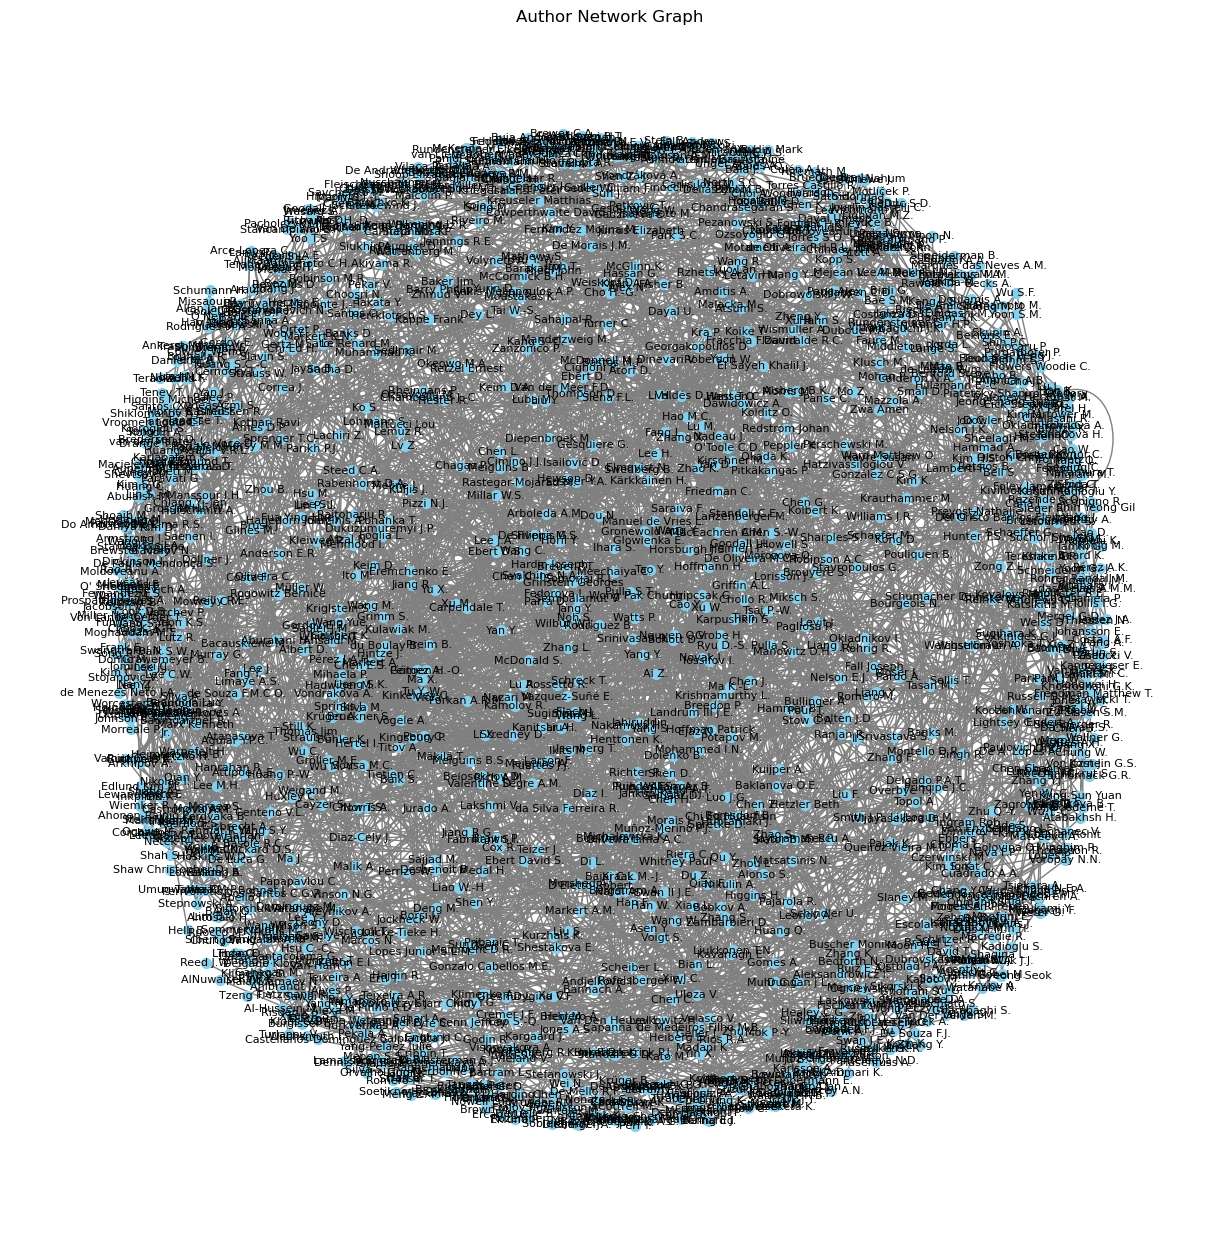

In [6]:
import json
import matplotlib.pyplot as plt
import networkx as nx
from networkx.readwrite import json_graph

# Load the JSON data
with open("network.json", "r") as file:
    graph_data = json.load(file)

# Convert JSON data to a NetworkX graph
graph = json_graph.node_link_graph(graph_data)

# Set up the figure
plt.figure(figsize=(12, 12))

# Define the layout and draw the graph
layout = nx.spring_layout(graph, k=0.5)
nx.draw(
    graph,
    pos=layout,
    with_labels=True,
    node_size=50,
    font_size=8,
    edge_color="gray",
    node_color="skyblue",
)

# Add a title and display the plot
plt.title("Author Network Graph")
plt.show()


In [7]:
df['Affiliation Country'] = df['Authors with affiliations'].apply(lambda x: x.split(', ')[-1] if x != 0 else 0)

top_countries = df['Affiliation Country'].value_counts().nlargest(10).index.tolist()

In [8]:
top_countries

['United States',
 'Germany',
 'United Kingdom',
 'South Korea',
 'China',
 'Canada',
 'Russian Federation',
 'Japan',
 'Brazil',
 'Australia']

In [9]:
import matplotlib.colors as mcolors

color_map = {country: color for country, color in zip(top_countries, plt.cm.tab10.colors)}
default_color = "#A9A9A9"

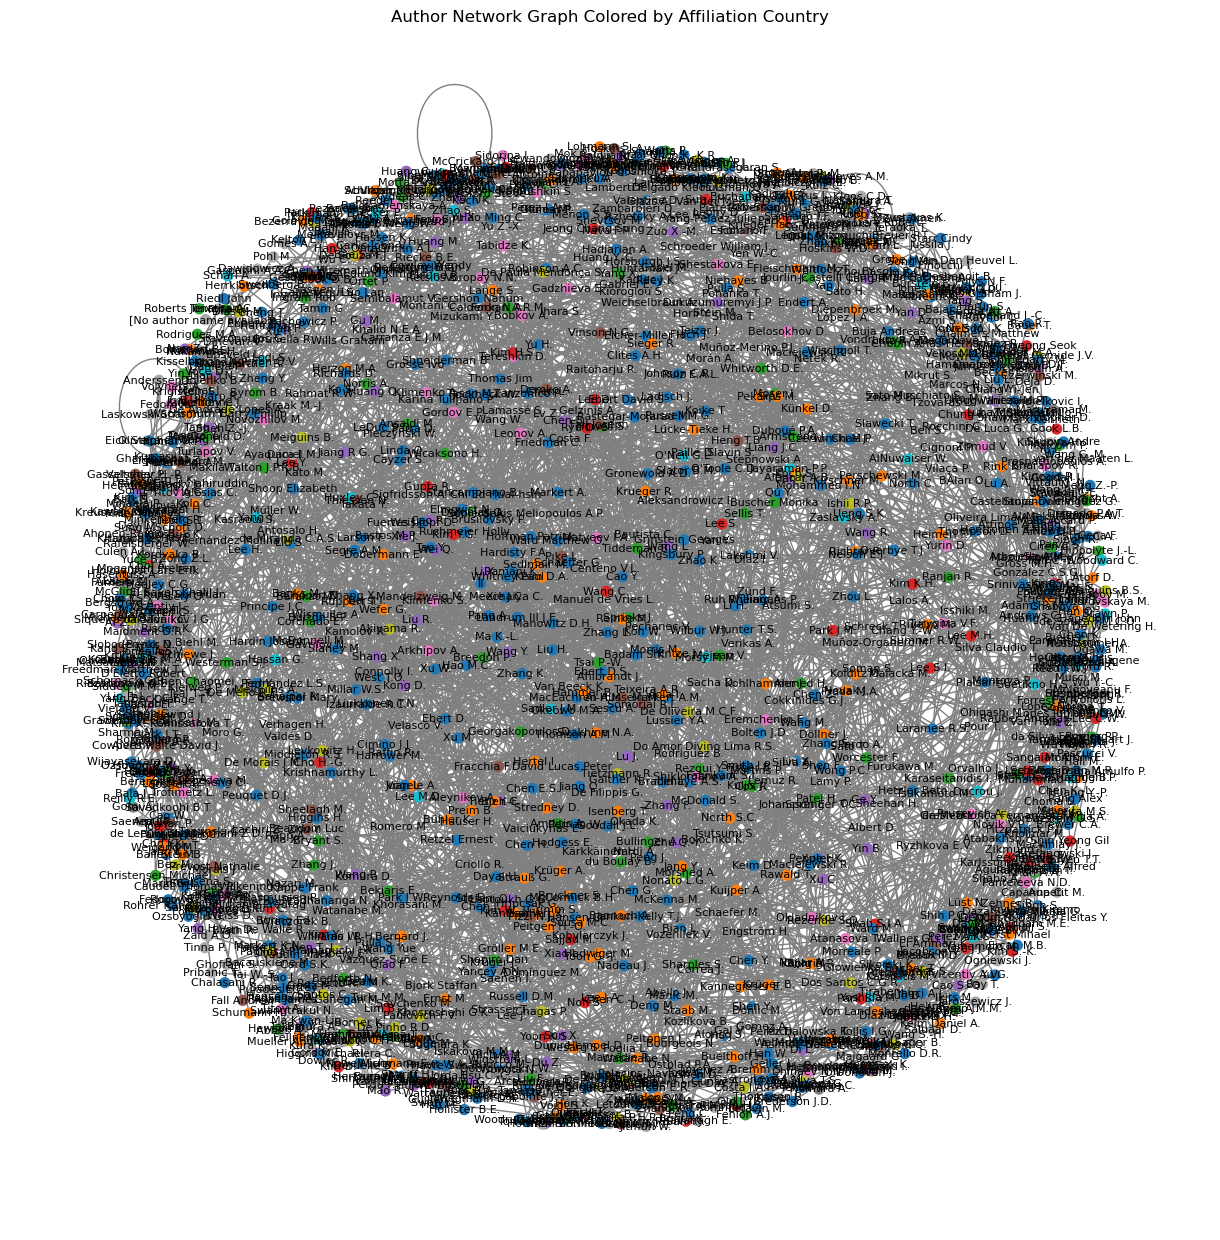

In [11]:
# Create an empty graph
G = nx.Graph()

# Iterate through the rows of the DataFrame
for _, row in df.iterrows():
    # Extract relevant data
    authors_list = row['Authors'].split(', ')
    publication_id = row['EID']
    affiliation_country = row['Affiliation Country']
    assigned_color = color_map.get(affiliation_country, default_color)
    
    # Add nodes for each author with their respective color
    for author in authors_list:
        G.add_node(author, color=assigned_color)
    
    # Add edges between co-authors with publication details
    for a_idx in range(len(authors_list)):
        for b_idx in range(a_idx + 1, len(authors_list)):
            G.add_edge(authors_list[a_idx], authors_list[b_idx], publication=publication_id)

# Plot the graph
plt.figure(figsize=(12, 12))
layout = nx.spring_layout(G, k=0.5)  # Define the layout
node_colors = [G.nodes[node]["color"] for node in G.nodes]  # Extract node colors
nx.draw(
    G, 
    pos=layout, 
    with_labels=True, 
    node_size=50, 
    font_size=8, 
    edge_color="gray", 
    node_color=node_colors
)
plt.title("Author Network Graph Colored by Affiliation Country")
plt.show()
